In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'Walmart_Store_sales.csv')

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.shape

(6435, 8)

In [5]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
data.duplicated().sum()

0

Basic Statistics and Analysis tasks.

Finding which store has the maximum sales.

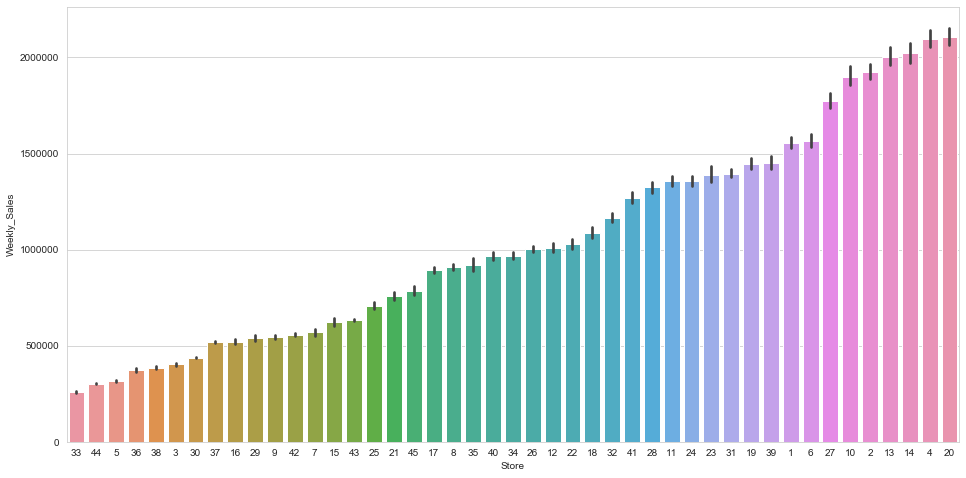

In [8]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
result = data.groupby(["Store"])['Weekly_Sales'].aggregate(np.sum).reset_index().sort_values('Weekly_Sales')
bar = sns.barplot(x='Store',y='Weekly_Sales', data=data, order=result['Store'])
plt.show()

From the above visualisation we can see store 20 has the maximum sales.

Now, let check for which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation.

In [9]:
Std_deviation = data.groupby(["Store"])['Weekly_Sales'].aggregate(np.std).reset_index()

In [10]:
Std_deviation.rename(columns={'Weekly_Sales': 'Std_deviation_Sales'}, inplace=True)

In [11]:
Std_deviation.sort_values(by=['Std_deviation_Sales'], ascending=False)

,Store,Std_deviation_Sales
13,14,317569.949476
9,10,302262.062504
19,20,275900.562742
3,4,266201.442297
12,13,265506.995776
22,23,249788.038068
26,27,239930.135688
1,2,237683.694682
38,39,217466.454833
5,6,212525.855862


We can also use group by and describe method to find the standard deviation and mean.

In [12]:
std = data.groupby(['Store'])

In [13]:
std.describe()

Weekly_Sales                                                        \
             count          mean            std         min          25%   
Store                                                                      
1            143.0  1.555264e+06  155980.767761  1316899.31  1458104.690   
2            143.0  1.925751e+06  237683.694682  1650394.44  1803500.635   
3            143.0  4.027044e+05   46319.631557   339597.38   367860.595   
4            143.0  2.094713e+06  266201.442297  1762539.30  1929611.490   
5            143.0  3.180118e+05   37737.965745   260636.71   294696.000   
6            143.0  1.564728e+06  212525.855862  1261253.18  1456147.170   
7            143.0  5.706173e+05  112585.469220   372673.61   497653.155   
8            143.0  9.087495e+05  106280.829881   772539.12   855905.435   
9            143.0  5.439806e+05   69028.666585   452905.22   506766.720   
10           143.0  1.899425e+06  302262.062504  1627707.31  1740771.310   
11           143.0  1.356383e+06  165833.887863  1100418.69  1267235.590   
12           143.0  1.009002e+06  139166.871880   802105.50   940077.460   
13           143.0  2.003620e+06  265506.995776  1633663.12  1877475.705   
14           143.0  2.020978e+06  317569.949476  1479514.66  1873297.900   
15           143.0  6.233125e+05  120538.652043   454183.42   565182.540   
16           143.0  5.192477e+05   85769.680133   368600.00   466043.285   
17           143.0  8.935814e+05  112162.936087   635862.55   817518.770   
18           143.0  1.084718e+06  176641.510839   540922.94  1000578.875   
19           143.0  1.444999e+06  191722.638730  1181204.53  1351960.260   
20           143.0  2.107677e+06  275900.562742  1761016.51  1950865.580   
21           143.0  7.560691e+05  128752.812853   596218.24   688848.930   
22           143.0  1.028501e+06  161251.350631   774262.28   961476.045   
23           143.0  1.389864e+06  249788.038068  1016756.10  1261918.815   
24           143.0  1.356755e+06  167745.677567  1057290.41  1254316.770   
25           143.0  7.067215e+05  112976.788600   558794.63   655484.635   
26           143.0  1.002912e+06  110431.288141   809833.21   938053.050   
27           143.0  1.775216e+06  239930.135688  1263534.86  1629423.370   
28           143.0  1.323522e+06  181758.967539  1079669.11  1189278.470   
29           143.0  5.394514e+05   99120.136596   395987.24   494461.215   
30           143.0  4.385796e+05   22809.665590   369722.32   426070.460   
31           143.0  1.395901e+06  125855.942933  1198071.60  1336419.660   
32           143.0  1.166568e+06  138017.252087   955463.84  1098315.065   
33           143.0  2.598617e+05   24132.927322   209986.25   242491.545   
34           143.0  9.667816e+05  104630.164676   836717.75   920238.620   
35           143.0  9.197250e+05  211243.457791   576332.05   801523.225   
36           143.0  3.735120e+05   60725.173579   270677.98   320540.030   
37           143.0  5.189003e+05   21837.461190   451327.61   507029.960   
38           143.0  3.857317e+05   42768.169450   303908.81   350365.655   
39           143.0  1.450668e+06  217466.454833  1158698.44  1316617.395   
40           143.0  9.641280e+05  119002.112858   764014.75   896637.670   
41           143.0  1.268125e+06  187907.162766   991941.73  1166352.440   
42           143.0  5.564039e+05   50262.925530   428953.60   515975.955   
43           143.0  6.333247e+05   40598.413260   505405.85   605517.605   
44           143.0  3.027489e+05   24762.832015   241937.11   283882.235   
45           143.0  7.859814e+05  130168.526635   617207.58   722791.565   

                                           Holiday_Flag           ...  \
              50%          75%         max        count     mean  ...   
Store                                                             ...   
1      1534849.64  1614892.030  2387950.20        143.0  0.06993  ...   
2      1879107.31  1956926.530  3436007.68        143.0  0.06993 

Store 14 has the maximum standard deviation.

Which store/s has good quarterly growth rate in Q3’2012.

In [14]:
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
start = '2012-07-01'
end = '2012-09-30'
after_start_date = data["Date"] >= start
before_end_date = data["Date"] <= end
between_two_dates = after_start_date & before_end_date
filtered_dates = data.loc[between_two_dates]

In [16]:
filtered_dates.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
109,1,2012-09-03,1675431.16,0,58.76,3.669,221.059189,7.348
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908


In [17]:
growth = filtered_dates.iloc[:,0:3]

In [18]:
growth.head()

,Store,Date,Weekly_Sales
109,1,2012-09-03,1675431.16
122,1,2012-08-06,1697230.96
127,1,2012-07-13,1527014.04
128,1,2012-07-20,1497954.76
129,1,2012-07-27,1439123.71


In [19]:
growth_pct = growth.groupby(['Store'])

In [20]:
growth_pct = growth_pct['Weekly_Sales'].pct_change()

In [21]:
growth_pct.head()

109         NaN
122    0.013011
127   -0.100291
128   -0.019030
129   -0.039274
Name: Weekly_Sales, dtype: float64

In [22]:
type(growth_pct)

pandas.core.series.Series

In [23]:
growth['pct_change'] = growth_pct

In [24]:
growth.head()

,Store,Date,Weekly_Sales,pct_change
109,1,2012-09-03,1675431.16,NaN
122,1,2012-08-06,1697230.96,0.013011
127,1,2012-07-13,1527014.04,-0.100291
128,1,2012-07-20,1497954.76,-0.019030
129,1,2012-07-27,1439123.71,-0.039274


In [25]:
growth.isnull().sum()

Store            0
Date             0
Weekly_Sales     0
pct_change      45
dtype: int64

In [26]:
growth.fillna(0, inplace=True)

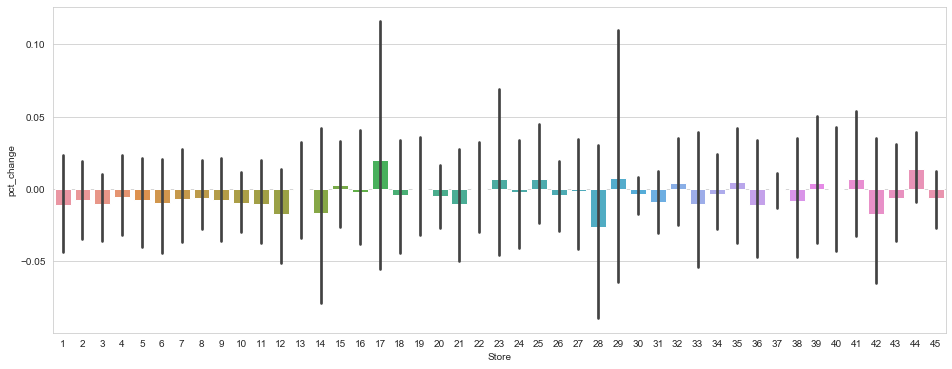

In [27]:
plt.figure(figsize=(16,6))
sns.set_style("whitegrid")
sns.barplot(x='Store',y='pct_change', data=growth)
plt.show()

We can see store 17 has good quarterly growth rate in Q3’2012.

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [28]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


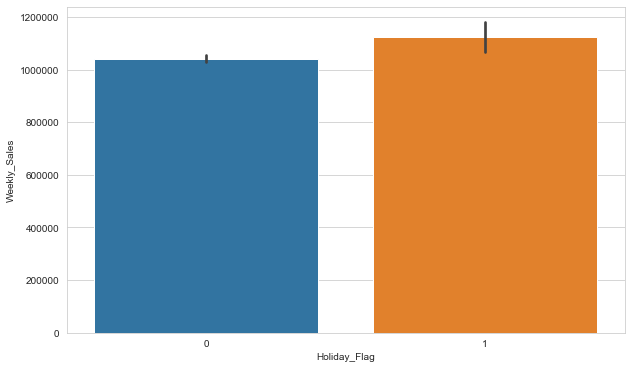

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales',data=data)
plt.show()

Non-holidays sales data.

In [30]:
non_holiday = data[data['Holiday_Flag'] == 0]

In [31]:
non_holiday.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106


In [32]:
mean = non_holiday['Weekly_Sales'].mean()

Holidays sales data.

In [33]:
holiday_data = data[data['Holiday_Flag']==1]

In [34]:
holiday_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742


In [35]:
high_sale = holiday_data[holiday_data['Weekly_Sales'] > mean]

In [36]:
high_sale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742


In [37]:
high_sale.shape

(220, 8)

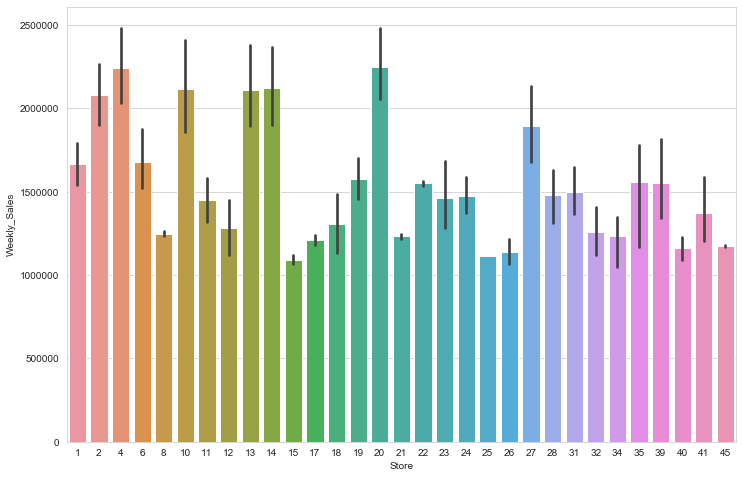

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x='Store',y='Weekly_Sales',data=high_sale)
plt.show()

Provide a monthly and semester view of sales in units and give insights.

In [39]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [40]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [41]:
year_2010 = data.loc[data['Year'] == 2010]
year_2011 = data.loc[data['Year'] == 2011]
year_2012 = data.loc[data['Year'] == 2012]

Monthly sales for year 2010.

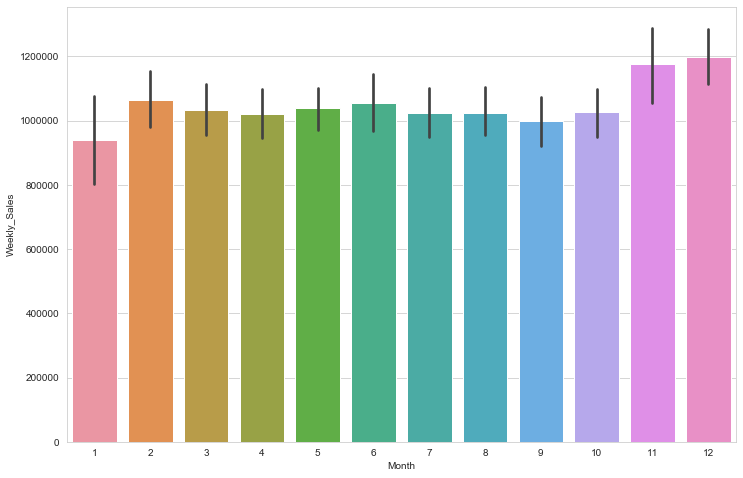

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month', y='Weekly_Sales', data=year_2010)
plt.show()

Monthly sales for year 2011.

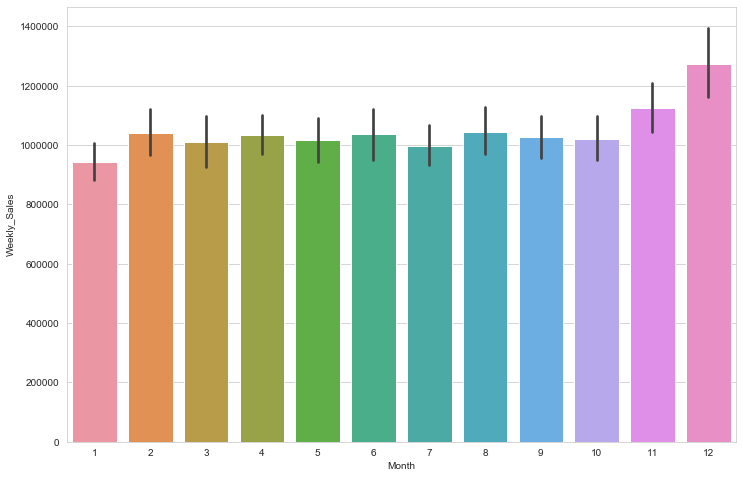

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month', y='Weekly_Sales', data=year_2011)
plt.show()

Monthly sales for year 2012.

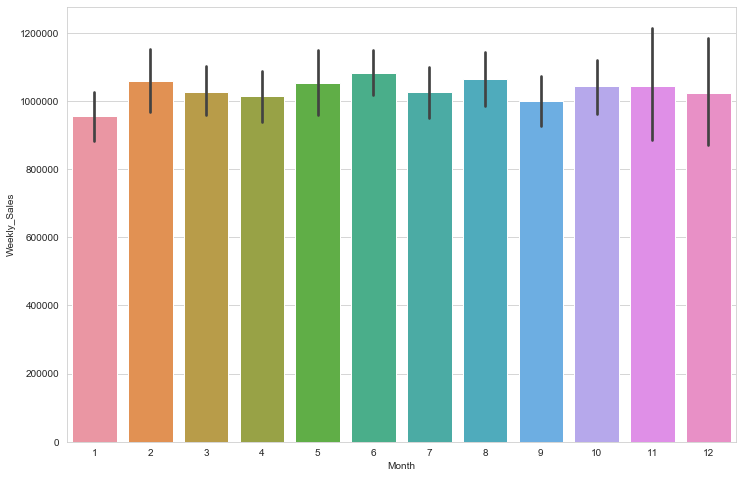

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month', y='Weekly_Sales', data=year_2012)
plt.show()

Complete monthly view of sales for all the years.

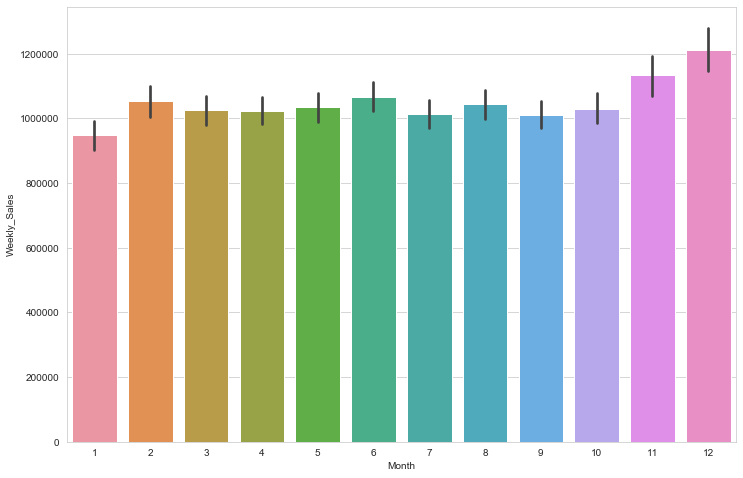

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month', y='Weekly_Sales', data=data)
plt.show()

Semester view of sales.

In [46]:
semester_sales=[]
semester_sales.append(year_2010.loc[year_2010["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(year_2010.loc[year_2010["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(year_2011.loc[year_2011["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(year_2011.loc[year_2011["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(year_2012.loc[year_2012["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(year_2012.loc[year_2012["Month"]>6,["Weekly_Sales"]].sum())

In [47]:
semester_names=["sem1_2010","sem2_2010","sem1_2011","sem2_2011","sem1_2012","sem2_2012"]

Text(0.5, 1.0, 'Semester view of sales')

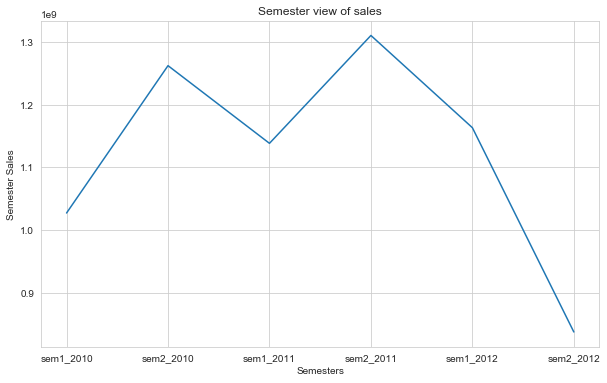

In [48]:
plt.figure(figsize=(10,6))
plt.plot(semester_names,semester_sales)
plt.xlabel("Semesters")
plt.ylabel("Semester Sales")
plt.title("Semester view of sales")

For Store 1 – Build  prediction models to forecast demand

In [49]:
store_1 = data[data['Store'] == 1]

In [50]:
store_1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [51]:
store_1.shape

(143, 10)

We will use T-test to find if CPI, unemployment, and fuel price have any impact on sales.

Null hypothesis - There is no impact.
Alternate hypothesis - Yes, there is an impact.

In [52]:
from scipy.stats import ttest_ind

In [53]:
def t_test(i):
    stat, pvalue = ttest_ind(store_1[i],store_1['Weekly_Sales'])
    print('Statistics=%.3f,pvalue=%.3f' % (stat,pvalue))
    if pvalue > 0.05:
        print('There is no impact (Failed to reject null hypothesis)')
    else:
        print('There is an impact (Reject the null hypothesis)')

Between CPI and sales.

In [54]:
t_test('CPI')

Statistics=-119.218,pvalue=0.000
There is an impact (Reject the null hypothesis)


Between unemployment and sales.

In [55]:
t_test('Unemployment')

Statistics=-119.234,pvalue=0.000
There is an impact (Reject the null hypothesis)


Between fuel price and sales.

In [56]:
t_test('Fuel_Price')

Statistics=-119.234,pvalue=0.000
There is an impact (Reject the null hypothesis)


In [57]:
date = []
for i in range(144):
    date.append(i)
    

In [58]:
del date[0]

In [59]:
store_1['date'] = date

C:\Users\91904\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
store_1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,date
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,5


In [61]:
X = store_1.drop(['Date','Weekly_Sales','Store'], axis=1)

In [62]:
y = store_1['Weekly_Sales']

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()

In [65]:
X = sc.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42) 

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression(n_jobs=-1)

In [70]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [71]:
print(lr.intercept_)
print(lr.coef_)

1536288.4365993417
[  7950.70821187 -32333.95208428  37943.72512149  36055.77137266
 -29656.56137261 -37583.37025386   4988.95153664 -24915.3802848 ]


In [72]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [73]:
print(sqrt(mean_squared_error(y_train,lr.predict(X_train))))
print(r2_score(y_train,lr.predict(X_train)))

135708.96854552196
0.08858745921250433


In [74]:
print(sqrt(mean_squared_error(y_test,lr.predict(X_test))))
print(r2_score(y_test,lr.predict(X_test)))

163038.85818616507
0.08836437428226385


Using XGBregression.

In [75]:
from xgboost import XGBRegressor

In [76]:
xgb = XGBRegressor()

In [77]:
xgb.fit(X_train,y_train)

[21:06:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\91904\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [78]:
print(sqrt(mean_squared_error(y_train,xgb.predict(X_train))))
print(r2_score(y_train,xgb.predict(X_train)))

40606.22107078293
0.918401335630779


In [79]:
print(sqrt(mean_squared_error(y_train,xgb.predict(X_train))))
print(r2_score(y_train,xgb.predict(X_train)))

40606.22107078293
0.918401335630779


Changing dates into days.

In [81]:
data['days'] = data['Date'].dt.day_name()

In [82]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,days
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday
